In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
class WeinsteinStrategy:
    def __init__(self, stock, time):
        self.stock=stock
        time = 2024-int(time)
        time = str(time)
        self.time= time
        data= yf.download(stock,start = time+ "-9-22" , end ="2024-9-22") 
        self.data=data.dropna()
        print(data)
        
        
        
    def determine_stage(self):
        self.data['Close'] = pd.to_numeric(self.data['Close'], errors='coerce')
        self.data["Stage"]="n/a"
        """Determines which stage the stock is in. 
           Assigns the stock every day based on price action. 
           Stage 1: Consolidation
           Stage 2: Advancing Phase/Uptrend
           Stage 3: Distribution Phase/Topping
           Stage 4: Declining Phase/Downtrend

        """
        
        for i in range(2, len(self.data["Close"])):
        
            close_i = self.data.iloc[i, 3]
            close_i_minus_1 = self.data.iloc[i - 1, 3]
            close_i_minus_2 = self.data.iloc[i - 2, 3]
            if close_i > close_i_minus_1 and close_i_minus_1 > close_i_minus_2:
                self.data.iloc[i,6] = 'Stage 1'
                
            elif close_i > close_i_minus_1 and close_i_minus_1 < close_i_minus_2:
                self.data.iloc[i,6] = 'Stage 2'
            elif close_i < close_i_minus_1 and close_i_minus_1 > close_i_minus_2:
                self.data.iloc[i,6]= 'Stage 3'
            elif close_i < close_i_minus_1 and close_i_minus_1 < close_i_minus_2:
                self.data.iloc[i,6] = 'Stage 4'
     
   
          
        
    def volume_confirmation(self):
        ##Confirms current volume is more than avg volume
        self.data['Volume_overall'] = self.data['Volume'].rolling(window=20*5).mean().dropna()
        self.data['Volume_Confirmation'] = self.data['Volume'] > self.data['Volume_overall']
  
    def BuyOrSell(self):
        #Long if the stock is trending above 100D MA, if the stock is in Stage 1 or Stage 2 and if there is volume confirmation
        #Short if the stock is trending below the 100D MA, if the stock is in Stage 3 or Stage 4 and if there is volume confirmation
        self.data['100_Day_MA'] = self.data['Close'].rolling(window=100).mean().dropna()
        self.data["verdict"]="n/a"
        self.data["position_size"]=0;
        print(self.data)
        for i in range(0, len(self.data)):
            if (((self.data.iloc[i,6] == 'Stage 1') or (self.data.iloc[i,6] == 'Stage 2')) and (self.data.iloc[i,3] > self.data.iloc[i,9]) and (self.data.iloc[i,8]==True)):
                self.data.iloc[i,10] = "Buy"
                self.data.iloc[i,11]=1
            elif(((self.data.iloc[i,6] == 'Stage 3') or (self.data.iloc[i,6] == 'Stage 4')) and (self.data.iloc[i,3] < self.data.iloc[i,9])):
                self.data.iloc[i,10] = "Sell"
                self.data.iloc[i,11]=-1
                
        self.data.dropna()
        return self.data
        
    def Backtester(self):
        self.data["returns"]= np.log(self.data.Close.div(self.data.Close.shift(1)))
        self.data["Strat_Returns"]= self.data["returns"]*self.data["position_size"].shift(1)
        self.data["CStrat_Returns"]= self.data["Strat_Returns"].cumsum().apply(np.exp)
        perf = self.data["CStrat_Returns"].dropna().iloc[-1]
     
        return (perf-1)*100
   
    def graph_results(self):
        title="Weinstein Strat for {}".format(self.stock)
        self.data[["CStrat_Returns"]].plot(title=title, figsize=(12,8))
        

   
  
        

In [181]:
test= WeinsteinStrategy("BAC", 2)



[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-09-22  33.310001  33.419998  32.389999  32.500000  30.557806  47527500
2022-09-23  31.930000  32.090000  31.209999  31.730000  29.833830  55316100
2022-09-26  31.320000  31.820000  30.680000  31.030001  29.175657  40360200
2022-09-27  31.270000  31.370001  30.299999  30.570000  28.743147  43396600
2022-09-28  30.530001  31.309999  30.389999  31.070000  29.213266  38372900
...               ...        ...        ...        ...        ...       ...
2024-09-16  38.810001  39.209999  38.790001  39.099998  38.883701  26336400
2024-09-17  39.279999  39.799999  39.209999  39.549999  39.331211  27769400
2024-09-18  39.619999  40.119999  39.419998  39.619999  39.400826  42527800
2024-09-19  40.040001  41.049999  40.009998  40.869999  40.643909  57977800
2024-09-20  40.619999  40.730000  40.240002  40.270000  40.047230  70725000

[502 rows x

In [183]:
test.determine_stage()

In [185]:
test.volume_confirmation()

In [187]:
test.BuyOrSell()

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2022-09-22  33.310001  33.419998  32.389999  32.500000  30.557806  47527500   
2022-09-23  31.930000  32.090000  31.209999  31.730000  29.833830  55316100   
2022-09-26  31.320000  31.820000  30.680000  31.030001  29.175657  40360200   
2022-09-27  31.270000  31.370001  30.299999  30.570000  28.743147  43396600   
2022-09-28  30.530001  31.309999  30.389999  31.070000  29.213266  38372900   
...               ...        ...        ...        ...        ...       ...   
2024-09-16  38.810001  39.209999  38.790001  39.099998  38.883701  26336400   
2024-09-17  39.279999  39.799999  39.209999  39.549999  39.331211  27769400   
2024-09-18  39.619999  40.119999  39.419998  39.619999  39.400826  42527800   
2024-09-19  40.040001  41.049999  40.009998  40.869999  40.643909  57977800   
2024-09-20  40.619999  40.730000  40.240002  40.2700

,Open,High,Low,Close,Adj Close,Volume,Stage,Volume_overall,Volume_Confirmation,100_Day_MA,verdict,position_size
Date,,,,,,,,,,,,
2022-09-22,33.310001,33.419998,32.389999,32.500000,30.557806,47527500,n/a,NaN,False,NaN,n/a,0
2022-09-23,31.930000,32.090000,31.209999,31.730000,29.833830,55316100,n/a,NaN,False,NaN,n/a,0
2022-09-26,31.320000,31.820000,30.680000,31.030001,29.175657,40360200,Stage 4,NaN,False,NaN,n/a,0
2022-09-27,31.270000,31.370001,30.299999,30.570000,28.743147,43396600,Stage 4,NaN,False,NaN,n/a,0
2022-09-28,30.530001,31.309999,30.389999,31.070000,29.213266,38372900,Stage 2,NaN,False,NaN,n/a,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-16,38.810001,39.209999,38.790001,39.099998,38.883701,26336400,Stage 2,37356617.0,False,39.5687,n/a,0
2024-09-17,39.279999,39.799999,39.209999,39.549999,39.331211,27769400,Stage 1,37347605.0,False,39.5810,n/a,0
2024-09-18,39.619999,40.119999,39.419998,39.619999,39.400826,42527800,Stage 1,37361723.0,True,39.5981,Buy,1


In [189]:
test.Backtester()

49.25364775099992

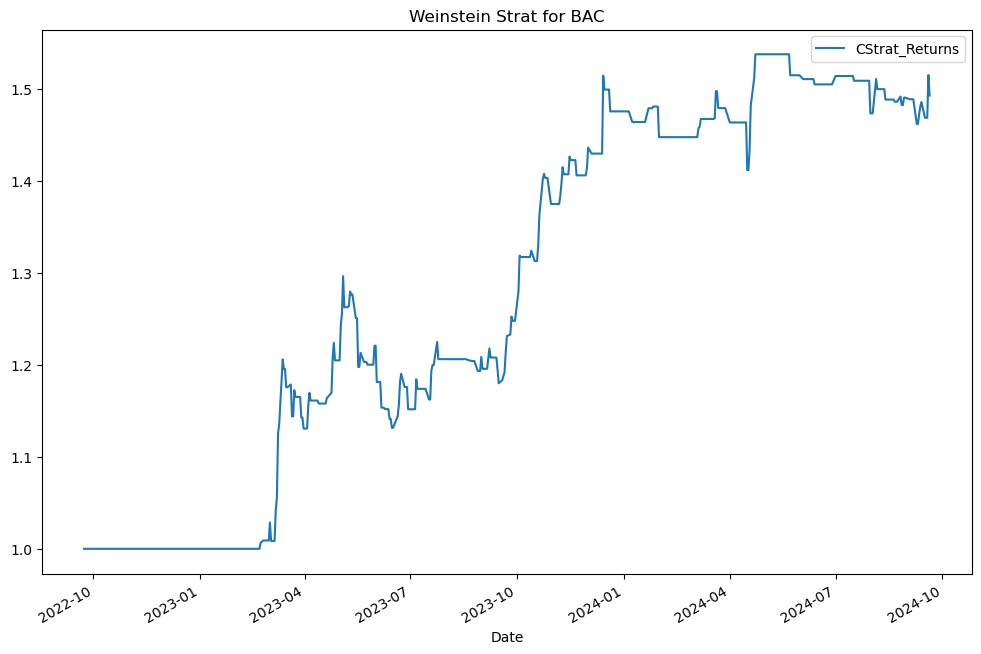

In [191]:
test.graph_results()